<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploratory Data Analysis on a Natural Language Processing Task

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructional team.

---

### External resources

These resources are not required reading but may be of use or interest.

- [**Python Graph Gallery**](https://python-graph-gallery.com/)
- [**Wikipedia page**](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [**A short (3-4 pages) academic paper**](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters 
# pandas will display in a column
pd.options.display.max_colwidth = 400

# distplots from Seaborn are still awesome
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

---

## Load data

In [54]:
df = pd.read_csv('data/mypersonality.csv')

# NOTICE! Do read the commented out code below...

#df = pd.read_csv('data/mypersonality_noprofanity.csv') 
# comment out above & 
# uncomment this to use mypersonality_noprofanity.csv if it 
# makes you more comfortable

df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 
                 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 
                 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

**Create a new column called `status_length` that contains the length of each status:**

In [56]:
df['status_length'] = df['STATUS'].apply(lambda x : len(x))

In [57]:
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121


**Create a new column called `status_word_count` that contains the number of words in each status:**

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [59]:
df['status_word_count'] = df['STATUS'].apply(lambda x : len(x.split()))

In [60]:
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26


In [61]:
df.dtypes

#AUTHID               object
STATUS                object
sEXT                 float64
sNEU                 float64
sAGR                 float64
sCON                 float64
sOPN                 float64
cEXT                  object
cNEU                  object
cAGR                  object
cCON                  object
cOPN                  object
DATE                  object
status_length          int64
status_word_count      int64
dtype: object

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

**Show the five longest and five shortest statuses based off of `status_word_count`:**

In [63]:
#create new df to record the result from df with reset_index and sort by Status word count 
df_sorted = df.sort_values(by='status_word_count').reset_index(drop=True)

In [64]:
df_sorted.columns = df_sorted.columns.str.lower()

In [65]:
#five longestdf_sorted.columns = df_sorted.columns.str.lower()
df_sorted.tail(5)

,#authid,status,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn,date,status_length,status_word_count
9911,ab10a89d4fa299fe348a3ee1d183b3ee,I was totally freaked out tonight while driving home with Janice at 12am. The black coupe next to me matched my speed even though I was going fast and then he continued to match me speed as I slowed down. So I turn to look at the driver of the car and he's wearing a mask. A rubber mask reminiscent to freddy cruger. 0_0 I almost had a heart attack. I then slowed down a lot and he continued on.....,4.38,2.38,4.00,3.25,2.63,y,n,y,n,n,09/21/09 07:28 AM,415,83
9912,1ece40ac9b657dea8c22a1fe58d3a6fe,"I always make it a rule to let the other fellow fire first. If a man wants to fight, I argue the question with him and try to show him how foolish it would be. If he can't be dissuaded, why then the fun begins but I always let him have first crack. Then when I fire, you see, I have the verdict of self-defence on my side. I know that he is pretty certain in his hurry, to miss. I never do.",3.50,1.75,4.75,3.00,4.25,n,n,y,n,y,12/07/09 04:07 AM,395,83
9913,c85845b82e705a32f674757d8912df23,"can't believe it. I got the new Wii Fit Plus game, it has a lot of fun new games and features. However, after not using the wii fit for a few months we decided to do the fitness test stuff again. Me(since last time): +2.9 lbs, still a healthy weight and BMI, wii age 54. *PROPNAME*: -8.6lbs, reccommends a healthy weight of gaining 6lbs, wii age 32. On the positive side, I have lost 5 of the 8 l...",2.25,2.75,4.50,4.25,2.50,n,n,y,y,n,01/08/10 07:32 PM,426,84
9914,502db2fcfe26705ae16a46c5cb2ad2e5,"If I wear makeup, I'm fake. If I like to get dressed up, I'm a Tart. If I say what i think, I'm a bitch. If I cry sometimes, I'm a drama queen. If I have guy friends, I'm a slut. If I stand up for myself, I'm mouthy. Seems like you can't do anything now a days without being labeled.. So what, go ahead and label me, see if i give a shit. Repost this if your proud of who you are! x x",3.20,3.30,4.55,3.20,4.45,n,y,y,n,y,02/18/11 08:33 AM,384,85
9915,9a8cf1dcb2de1a8f70c4745a636bbb96,"Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it. Dmv: Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: ...",3.75,3.25,4.50,5.00,4.00,y,y,y,y,y,10/30/09 02:05 PM,413,89


In [66]:
#five shortest 
df_sorted.head(5)

,#authid,status,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn,date,status_length,status_word_count
0,4bbb1f5843d9d6e8966dce58179f01de,157,2.55,2.65,4.0,2.95,4.05,n,n,y,n,y,07/13/09 01:27 PM,3,1
1,dba5f5266d03dd6d4db084ad7dbc683c,"wed,.",1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/02/09 05:32 AM,5,1
2,c3f4b3e345cb6b032db2e0459d179db3,HOUSE!,2.45,4.00,3.8,2.80,4.25,n,y,y,n,y,10/13/09 12:00 AM,6,1
3,e6cdef6f475cce3023c5b715f8c9f110,Err:509,1.80,2.90,2.9,3.00,4.20,n,y,n,n,y,10/10/09 07:23 PM,7,1
4,dba5f5266d03dd6d4db084ad7dbc683c,confused,1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/04/09 02:18 AM,8,1


## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

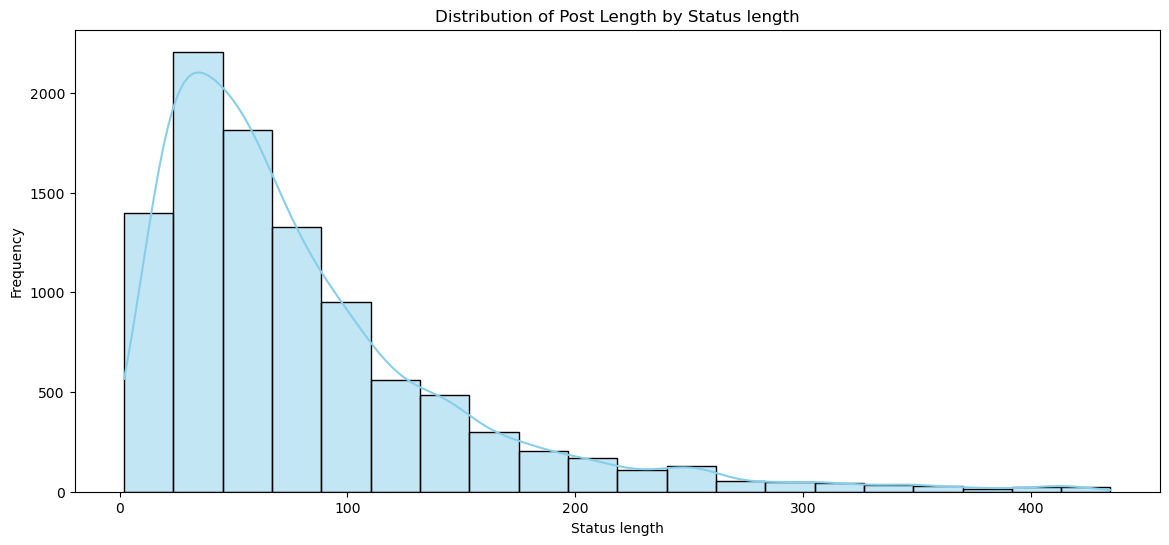

In [68]:
plt.figure(figsize=(14, 6))

sns.histplot(df_sorted['status_length'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Post Length by Status length')
plt.xlabel('Status length')
plt.ylabel('Frequency');

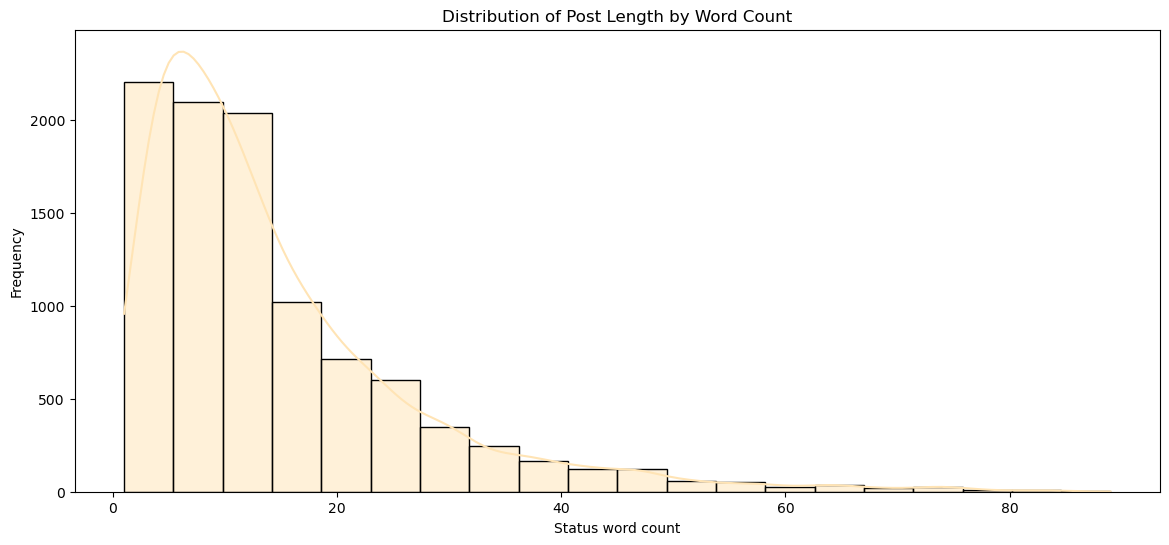

In [69]:
plt.figure(figsize=(14, 6))

sns.histplot(df_sorted['status_word_count'], kde=True, color='moccasin', bins=20)
plt.title('Distribution of Post Length by Word Count')
plt.xlabel('Status word count')
plt.ylabel('Frequency');

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [71]:
df_sorted.dtypes

#authid               object
status                object
sext                 float64
sneu                 float64
sagr                 float64
scon                 float64
sopn                 float64
cext                  object
cneu                  object
cagr                  object
ccon                  object
copn                  object
date                  object
status_length          int64
status_word_count      int64
dtype: object

In [72]:
# 'sext', 'sneu', 'sagr', 'scon', 'sopn' 
# 'cext', 'cneu', 'cagr', 'ccon', 'copn'  

class_columns = ['cext', 'cneu', 'cagr', 'ccon', 'copn']

# Define score variable

score_columns =['sext', 'sneu', 'sagr', 'scon', 'sopn']

In [73]:
# feature engineering by mapping the values in class column to number
#for class_column in class_columns:
   # df_sorted[class_column] = df_sorted[class_column].map({'y':1, 'n':0})

In [74]:
df_sorted.head()

,#authid,status,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn,date,status_length,status_word_count
0,4bbb1f5843d9d6e8966dce58179f01de,157,2.55,2.65,4.0,2.95,4.05,n,n,y,n,y,07/13/09 01:27 PM,3,1
1,dba5f5266d03dd6d4db084ad7dbc683c,"wed,.",1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/02/09 05:32 AM,5,1
2,c3f4b3e345cb6b032db2e0459d179db3,HOUSE!,2.45,4.00,3.8,2.80,4.25,n,y,y,n,y,10/13/09 12:00 AM,6,1
3,e6cdef6f475cce3023c5b715f8c9f110,Err:509,1.80,2.90,2.9,3.00,4.20,n,y,n,n,y,10/10/09 07:23 PM,7,1
4,dba5f5266d03dd6d4db084ad7dbc683c,confused,1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/04/09 02:18 AM,8,1


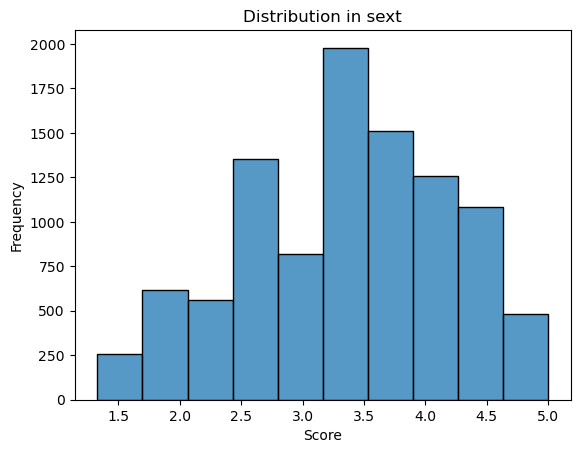

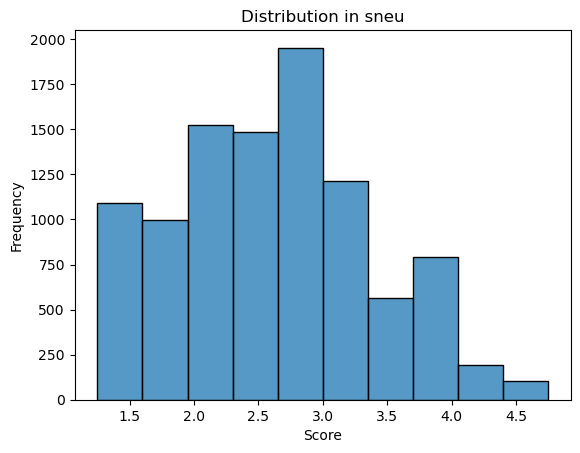

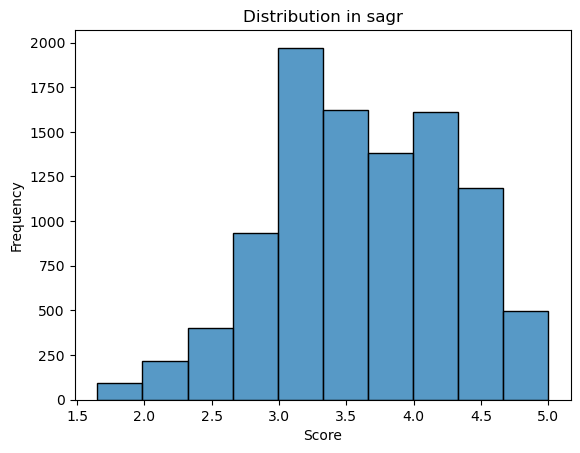

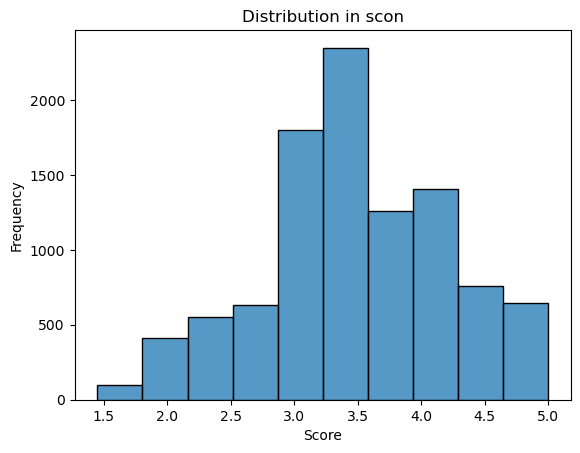

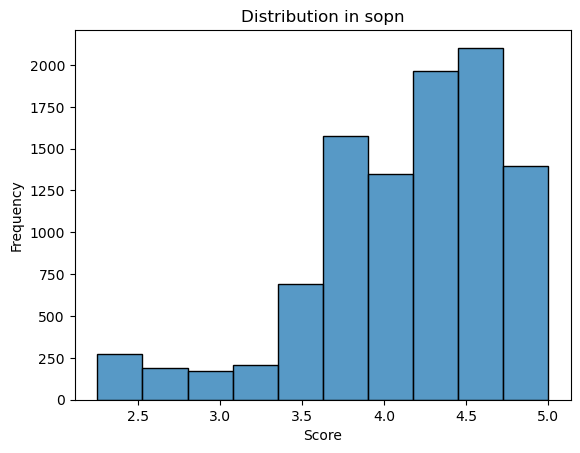

In [75]:
# Define Var to looping instead of 1-1 Score

for score_column in score_columns:    
    #sns.histplot(data=df_sorted, x=df_sorted['sext'], kde=False, bins=10)
    sns.histplot(data=df_sorted, x=score_column, kde=False, bins=10)
    plt.title(f'Distribution in {score_column}')
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show();

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [77]:
#number of user
df_sorted['#authid'].nunique()

250

In [78]:
#post per user
posts_per_user = df_sorted['#authid'].value_counts()
posts_per_user

#authid
e6cdef6f475cce3023c5b715f8c9f110    223
6f2bebc01062eb8334dccba3e048fdb5    219
527ed53d2ba3a3bc417b8402d5b2f556    194
d7e500ad854a1b6ced39e53a525b8a6d    184
0737e4e4980f56c9fb1cb5743001c917    172
                                   ... 
c255a1cb2939ce6b4719a8a0cc085624      1
127d3a99f86b3ee848fd0449bec048fc      1
a286b7286b1247d4a7851709e9f31e1e      1
a764ca41dca158d7a191505dcc8ce47f      1
ac8bf16a381d07c01b11651994ecb746      1
Name: count, Length: 250, dtype: int64

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

**Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:**

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [**drop_duplicates()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [80]:


unique_user = df_sorted[['#authid', 'sext', 'sneu', 'sagr', 'scon', 'sopn', 'cext', 'cneu', 'cagr', 'ccon', 'copn']].drop_duplicates()

In [81]:
for class_column in class_columns:
    unique_user[class_column] = df_sorted[class_column].map({'y':1, 'n':0})


unique_user 

,#authid,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn
0,4bbb1f5843d9d6e8966dce58179f01de,2.55,2.65,4.00,2.95,4.05,0,0,1,0,1
1,dba5f5266d03dd6d4db084ad7dbc683c,1.55,2.45,3.50,3.40,4.50,0,0,0,0,1
2,c3f4b3e345cb6b032db2e0459d179db3,2.45,4.00,3.80,2.80,4.25,0,1,1,0,1
3,e6cdef6f475cce3023c5b715f8c9f110,1.80,2.90,2.90,3.00,4.20,0,1,0,0,1
7,2609216746274fd785c35801fb53e9d8,4.50,3.00,2.25,5.00,4.75,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8167,7e0954e34b5af347696eb260230bccda,2.90,2.45,3.85,3.10,3.90,0,0,1,0,1
8483,127d3a99f86b3ee848fd0449bec048fc,3.35,2.05,3.00,3.85,4.50,0,0,0,1,1
9031,a286b7286b1247d4a7851709e9f31e1e,4.25,3.00,3.25,3.50,4.00,1,1,0,1,1
9095,ba1463b4d7bcf9c3167df26e0eb1dc57,3.50,2.55,4.75,2.90,4.70,0,0,1,0,1


**Plot the distribution of personality scores for `unique_users`:**

Do the distributions look different? Here, each individual user will only be represented once.

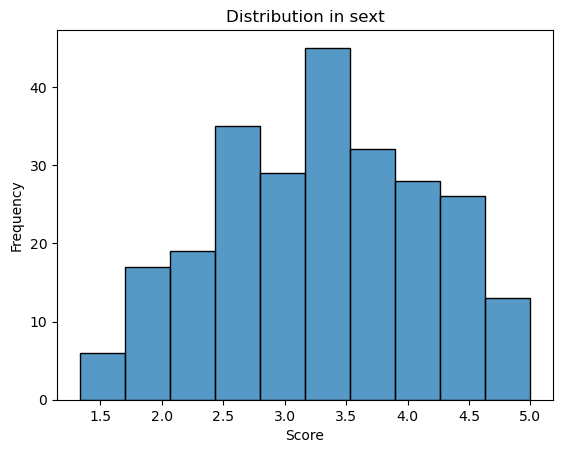

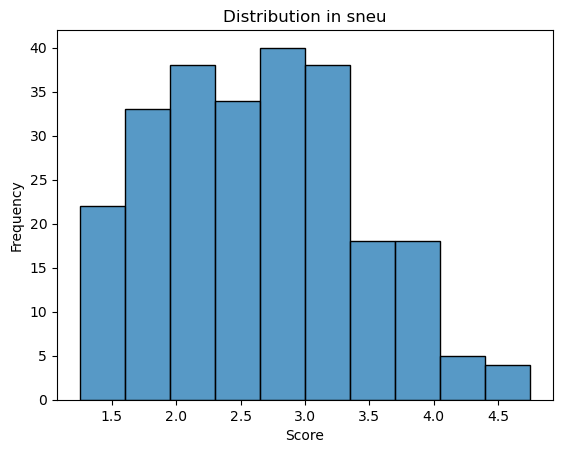

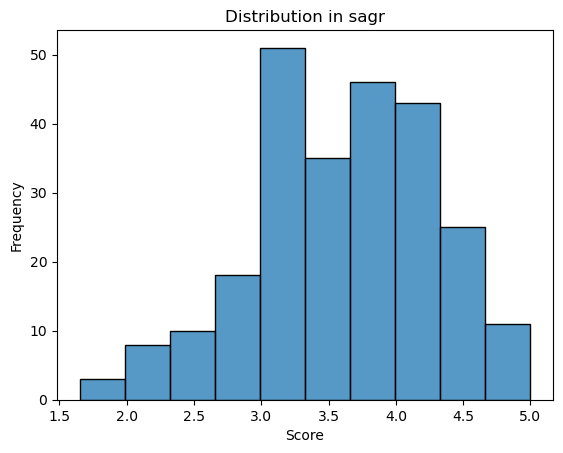

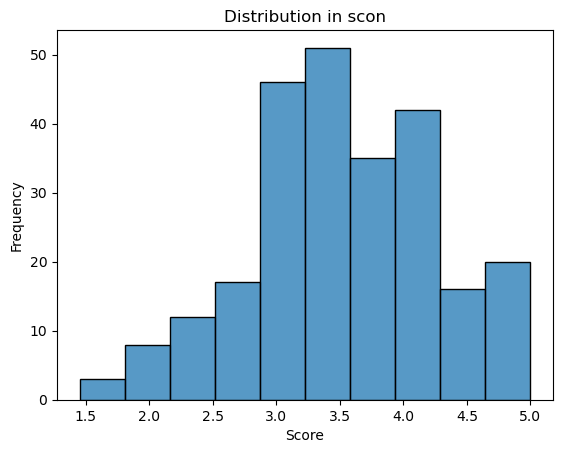

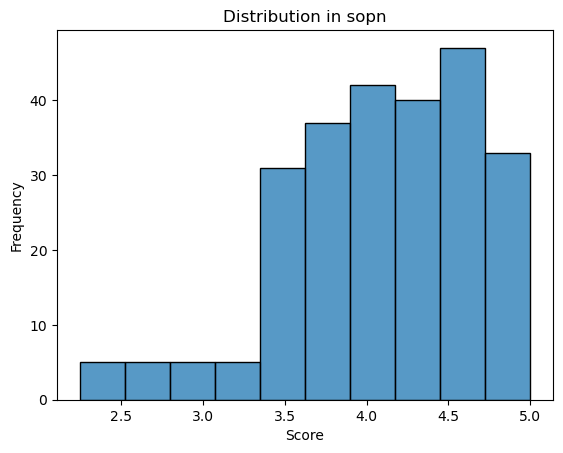

In [207]:

for score_column in score_columns:    
    sns.histplot(data=unique_user, x=score_column, kde=False, bins=10)
    plt.title(f'Distribution in {score_column}')
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show();

**Use the `.describe()` method on `unique_users`:**

In [85]:
unique_user.describe()

,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.292120,2.627240,3.600320,3.522920,4.07856,0.384000,0.396000,0.536000,0.520000,0.704000
std,0.861368,0.776835,0.670758,0.740211,0.57506,0.487334,0.490045,0.499703,0.500602,0.457407
min,1.330000,1.250000,1.650000,1.450000,2.25000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.662500,2.000000,3.150000,3.000000,3.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.300000,2.590000,3.660000,3.500000,4.15000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,4.000000,3.150000,4.100000,4.050000,4.50000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,4.750000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df_sorted.describe()

,sext,sneu,sagr,scon,sopn,status_length,status_word_count
count,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000
mean,3.354730,2.609515,3.616579,3.474244,4.130329,80.646934,14.525111
std,0.857616,0.760261,0.682490,0.737240,0.585673,68.242783,12.463420
min,1.330000,1.250000,1.650000,1.450000,2.250000,2.000000,1.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,34.000000,6.000000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,60.000000,11.000000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,104.000000,19.000000
max,5.000000,4.750000,5.000000,5.000000,5.000000,435.000000,89.000000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

In [88]:
#Plots of Score to visualize the pattern and trends of data 
#Tables information is show the statistic data support our analysis 
#According to analysis the data, I will use two method to get to know the data

#### Other visualizations:

Create at least 2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Bar charts of users per category per trait
- Seaborn correlation heatmap
- Seaborn pairplot

In [90]:
unique_user.dtypes

#authid     object
sext       float64
sneu       float64
sagr       float64
scon       float64
sopn       float64
cext         int64
cneu         int64
cagr         int64
ccon         int64
copn         int64
dtype: object

In [91]:
correlation_matrix= unique_user.drop(columns=['#authid']).corr()
correlation_matrix

,sext,sneu,sagr,scon,sopn,cext,cneu,cagr,ccon,copn
sext,1.000000,-0.377248,0.205420,0.200926,0.203027,0.809257,-0.344986,0.137305,0.198608,0.105977
sneu,-0.377248,1.000000,-0.420796,-0.234329,-0.135144,-0.255289,0.815518,-0.320615,-0.210582,-0.122905
sagr,0.205420,-0.420796,1.000000,0.099657,0.179662,0.166097,-0.373523,0.825034,0.036938,0.202285
scon,0.200926,-0.234329,0.099657,1.000000,0.082613,0.166437,-0.246664,0.122460,0.804407,0.034115
sopn,0.203027,-0.135144,0.179662,0.082613,1.000000,0.162913,-0.046137,0.134768,0.078782,0.793536
cext,0.809257,-0.255289,0.166097,0.166437,0.162913,1.000000,-0.269335,0.091429,0.182399,0.079561
cneu,-0.344986,0.815518,-0.373523,-0.246664,-0.046137,-0.269335,1.000000,-0.312656,-0.237050,-0.030387
cagr,0.137305,-0.320615,0.825034,0.122460,0.134768,0.091429,-0.312656,1.000000,0.085410,0.204943
ccon,0.198608,-0.210582,0.036938,0.804407,0.078782,0.182399,-0.237050,0.085410,1.000000,0.008419
copn,0.105977,-0.122905,0.202285,0.034115,0.793536,0.079561,-0.030387,0.204943,0.008419,1.000000


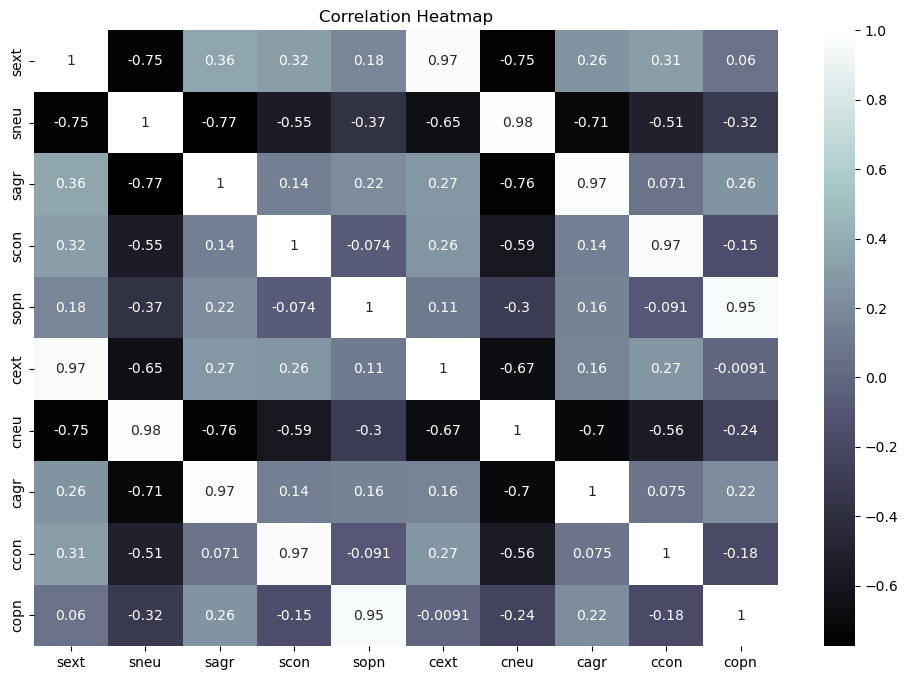

In [92]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='bone');
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1200x800 with 0 Axes>

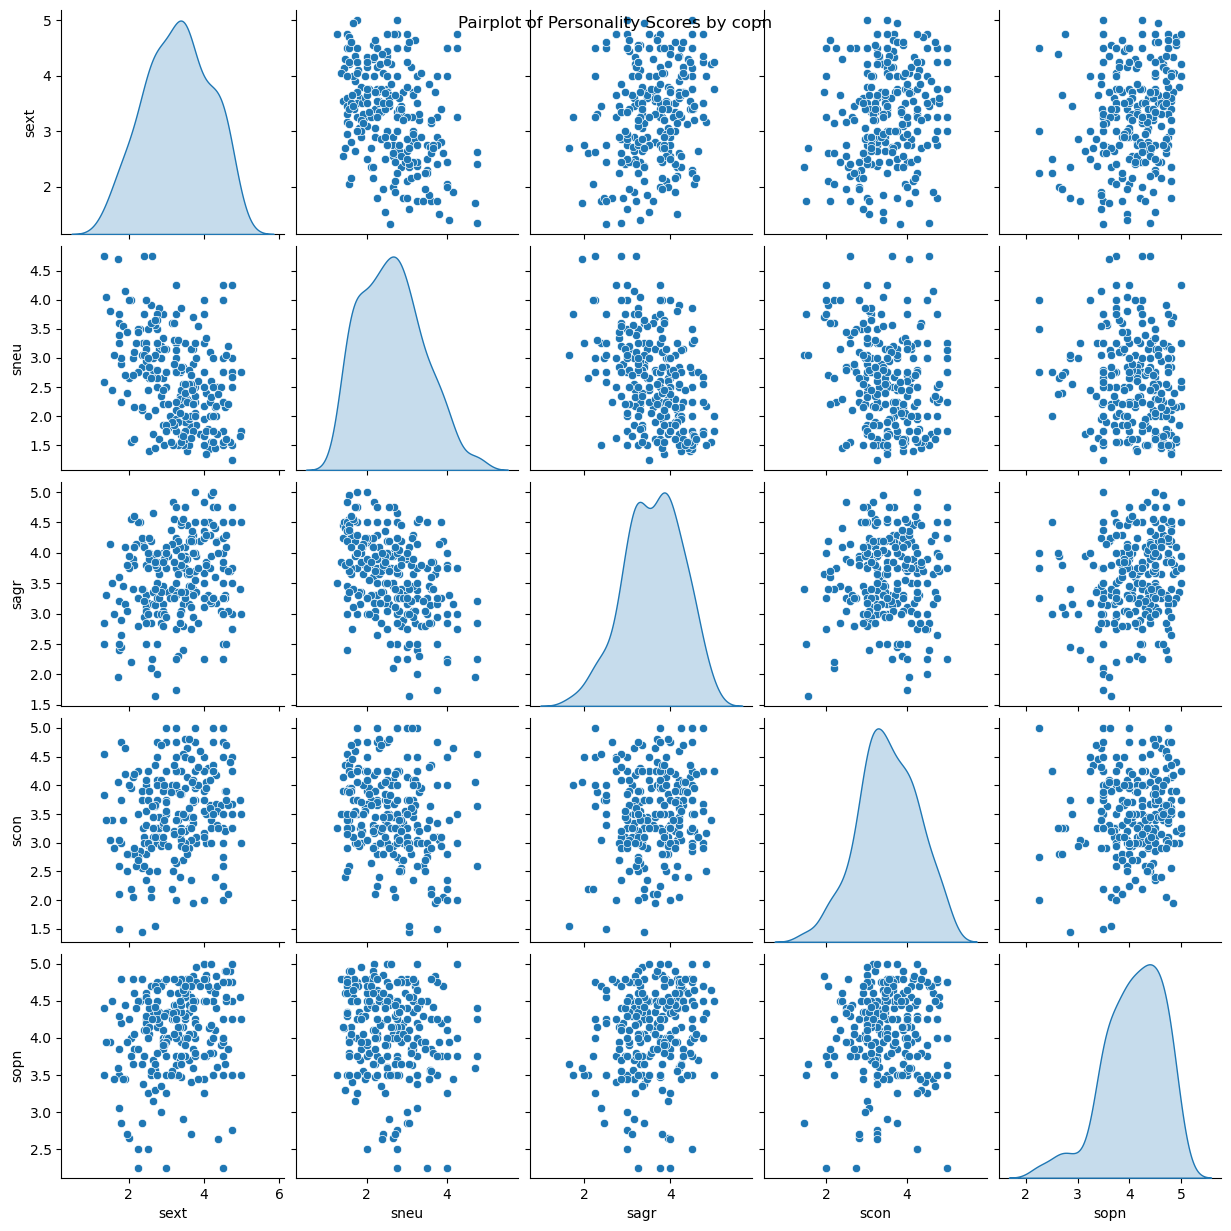

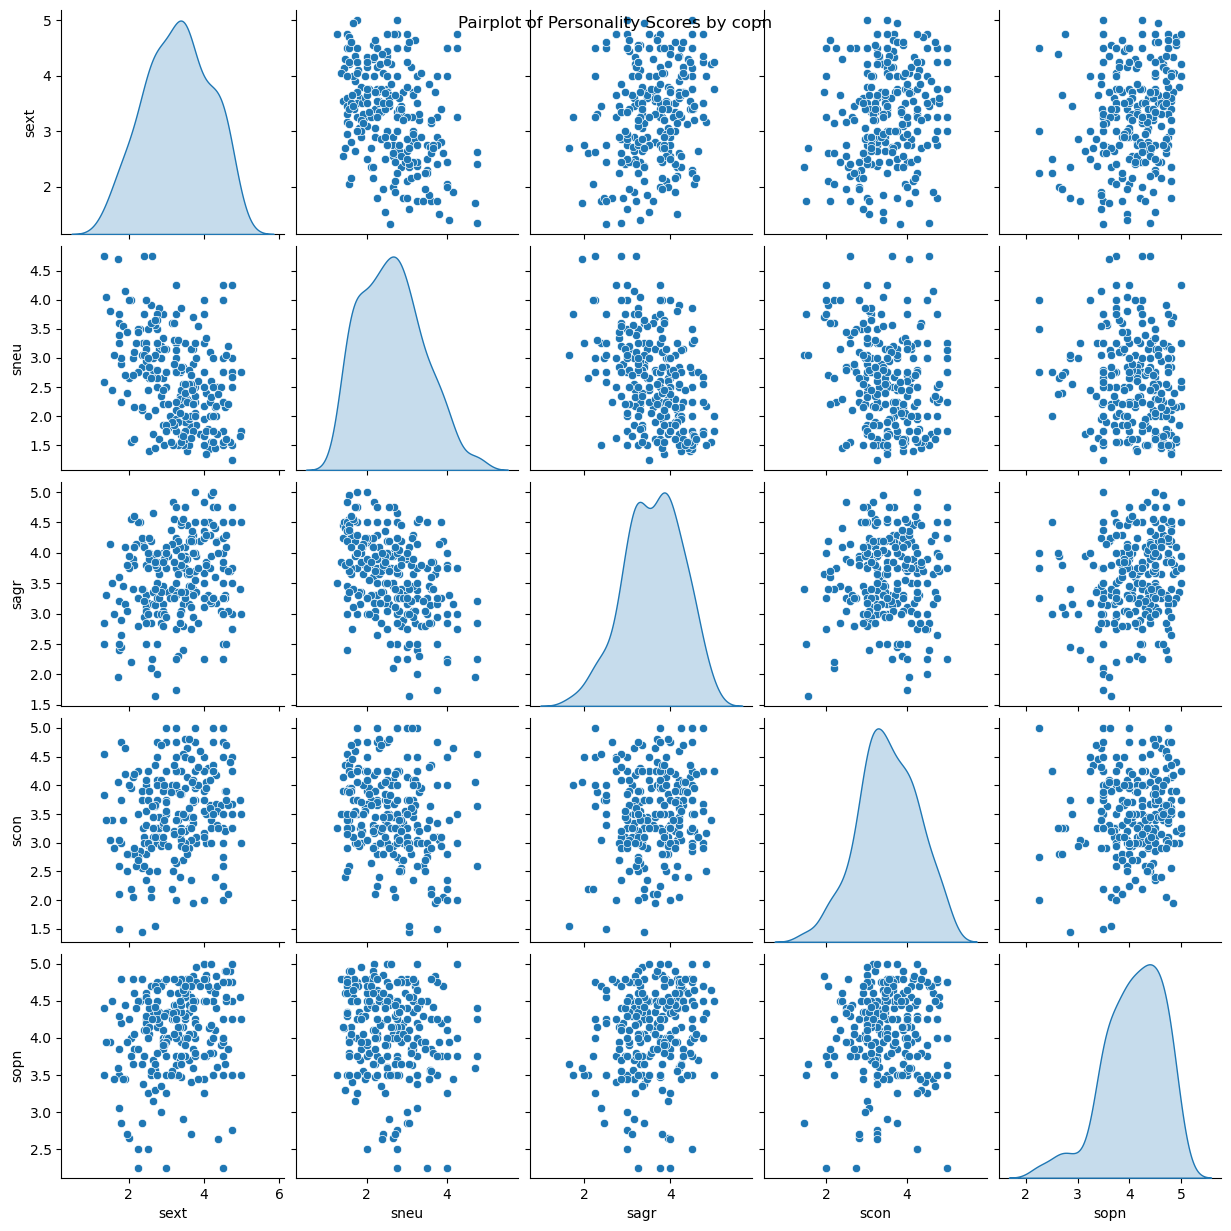

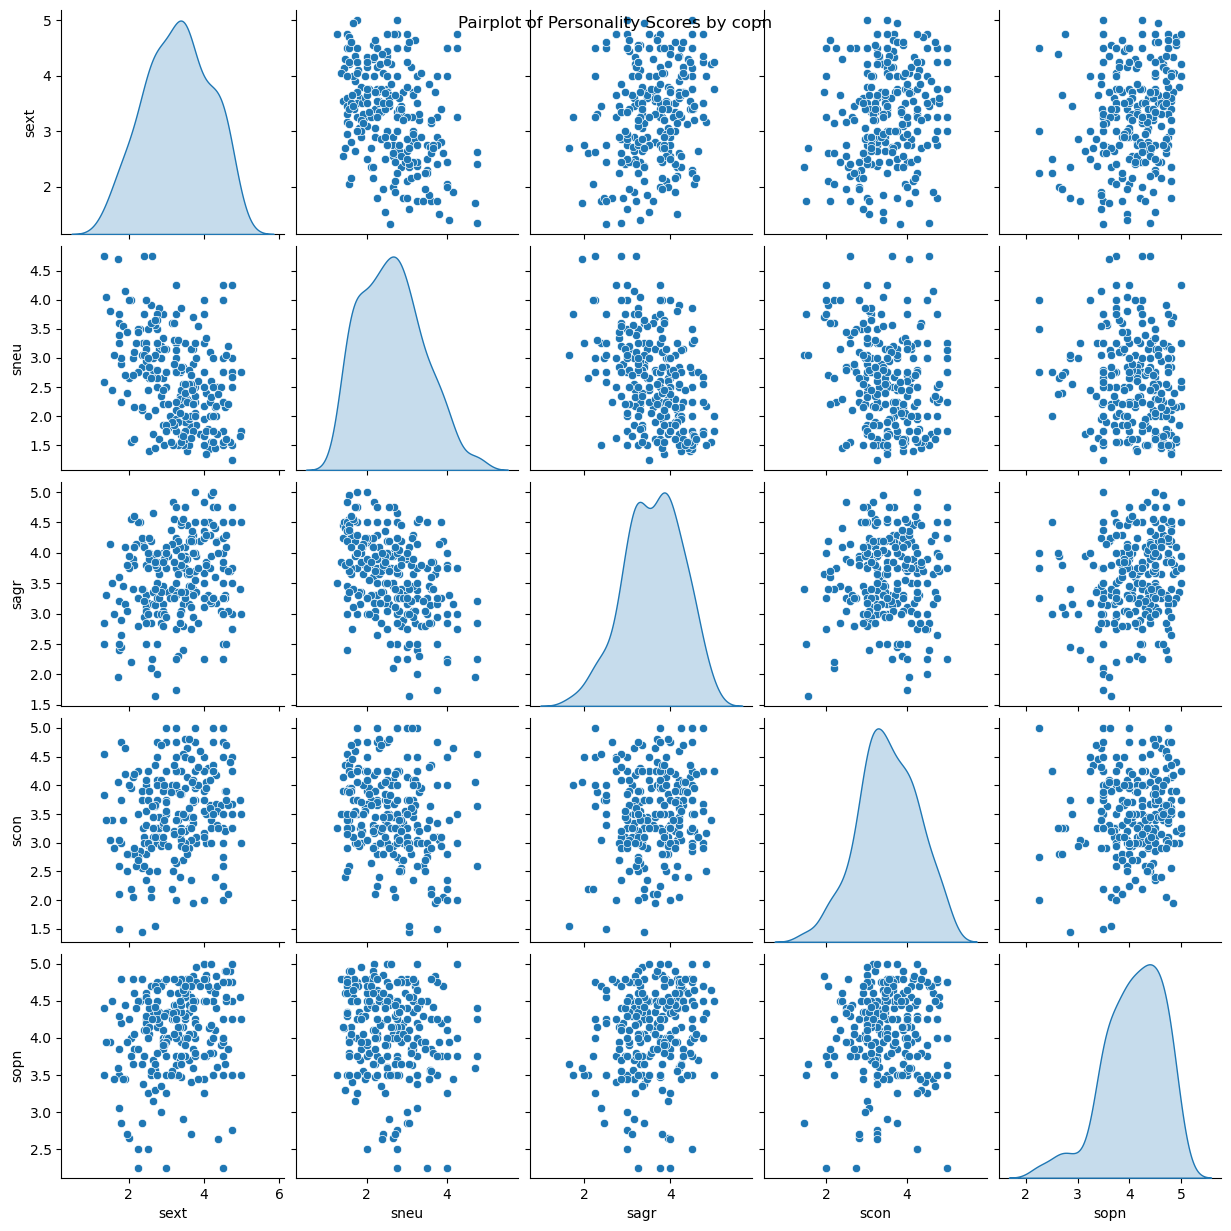

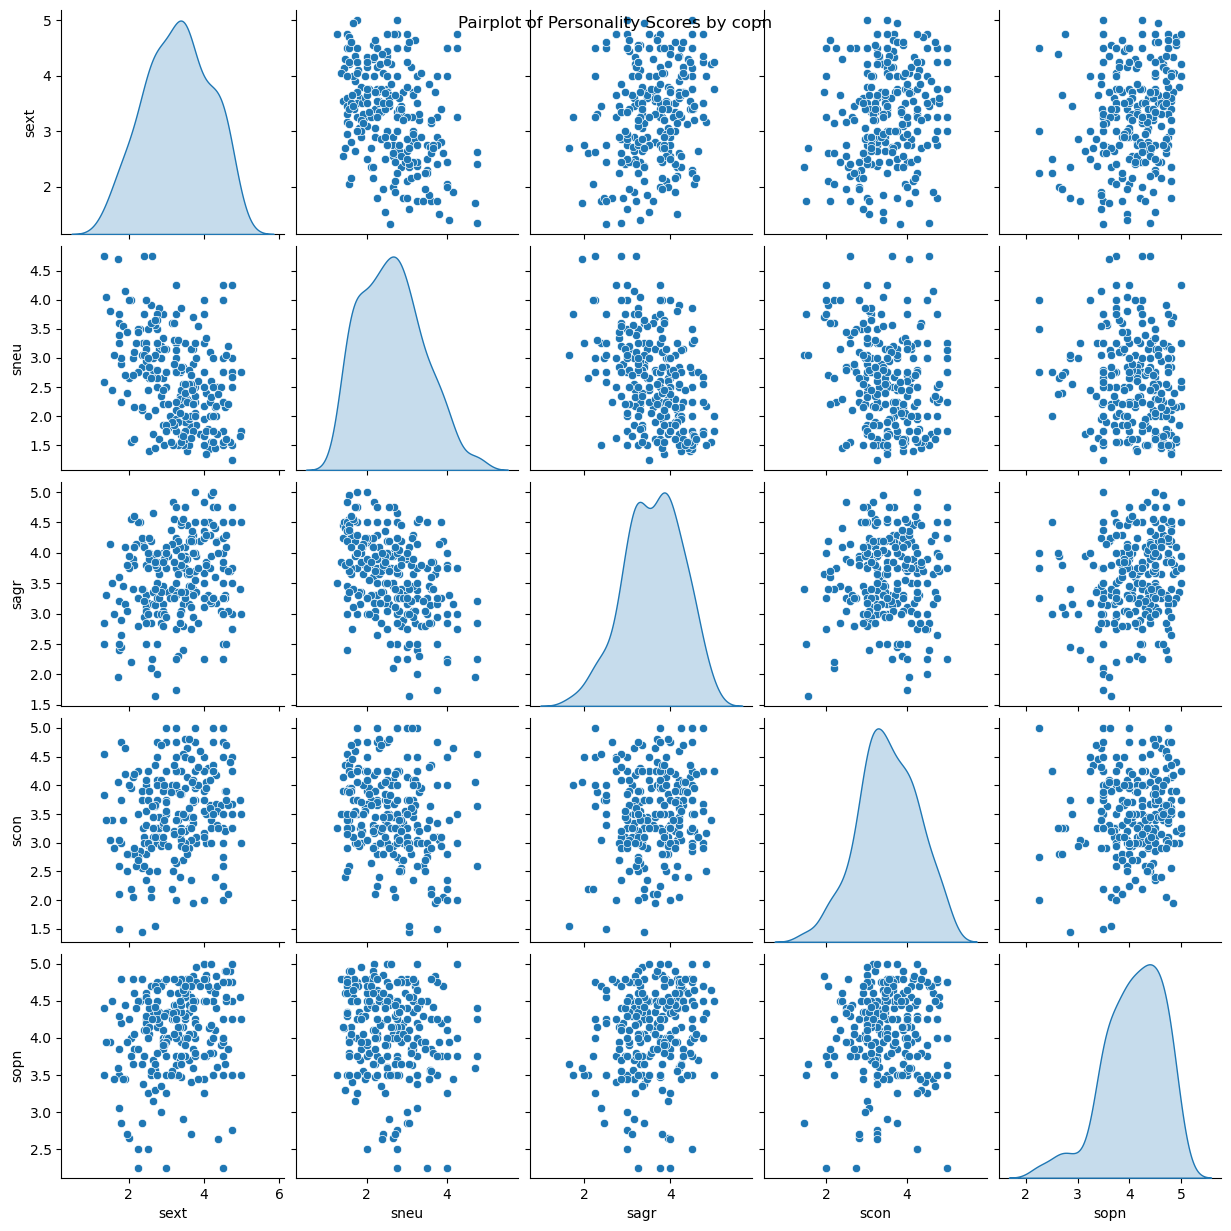

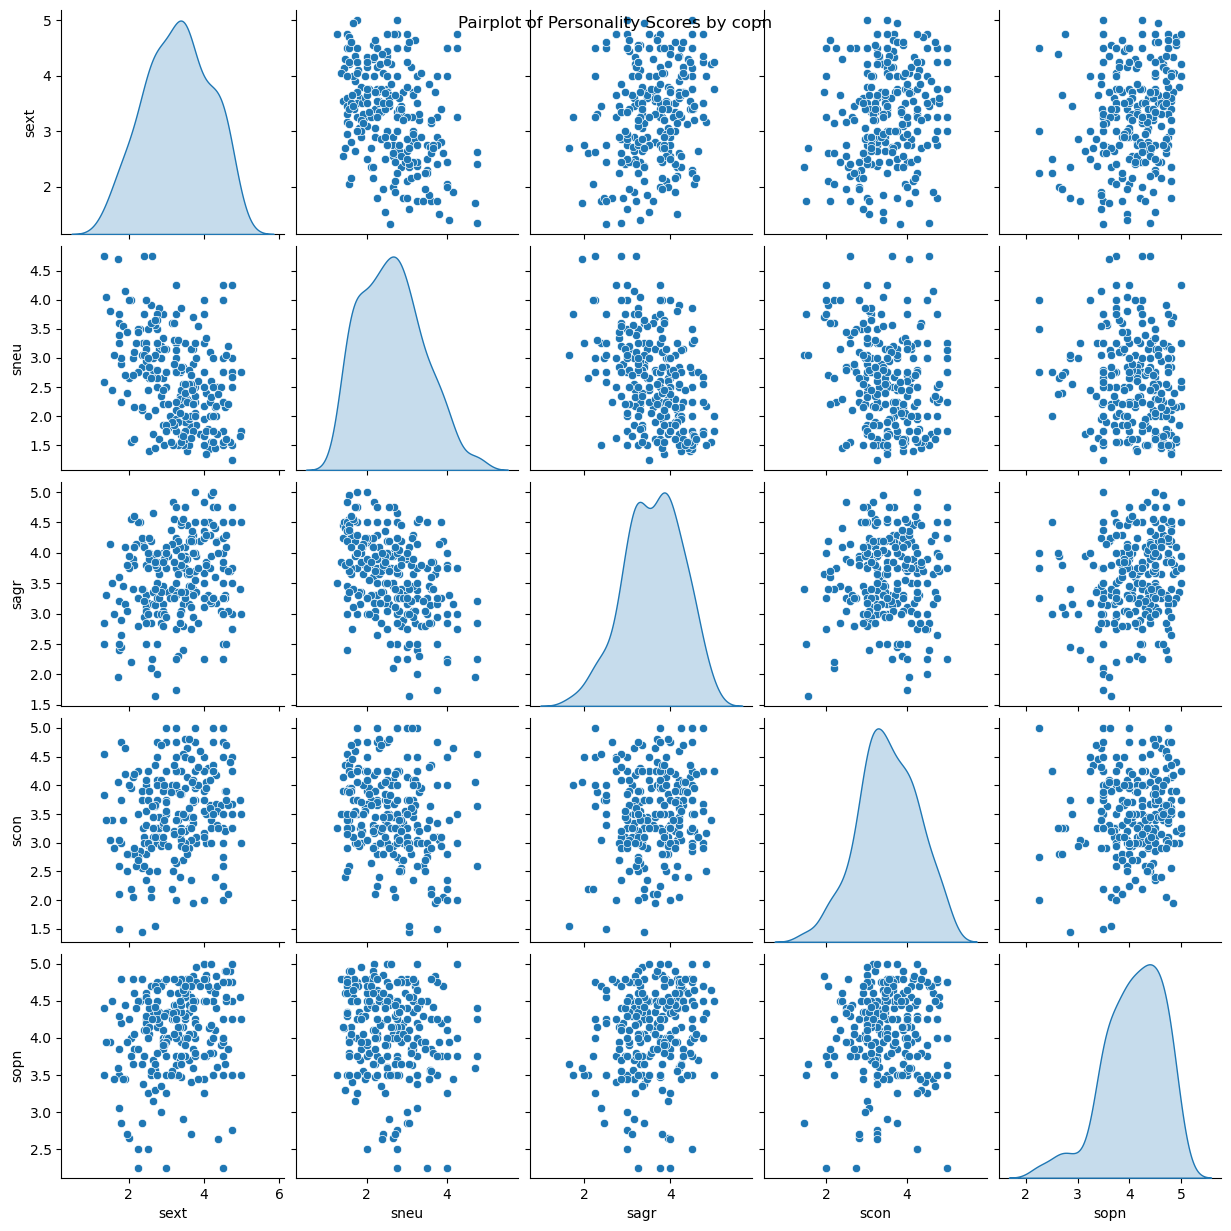

In [93]:
#Seaborn Pairplot


plt.figure(figsize=(12, 8))
for score_column in score_columns:
    sns.pairplot(unique_user, vars=score_columns, diag_kind="kde")
    plt.suptitle(f"Pairplot of Personality Scores by {class_column}")
    plt.show()

---

## Exploring status length and word count based on personality

**Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.**

You'll need to use `groupby()` five separate times for this.

In [95]:
# will change to loop function if have time
cext_mean_word = df_sorted.groupby('cext')['status_word_count'].mean()
cext_mean_length = df_sorted.groupby('cext')['status_length'].mean()

cneu_mean_word =  df_sorted.groupby('cneu')['status_word_count'].mean()
cneu_mean_length = df_sorted.groupby('cneu')['status_length'].mean()

cagr_mean_word =df_sorted.groupby('cagr')['status_word_count'].mean()
cagr_mean_length =df_sorted.groupby('cagr')['status_length'].mean()

ccon_mean_word = df_sorted.groupby('ccon')['status_word_count'].mean()
ccon_mean_length = df_sorted.groupby('cagr')['status_length'].mean()

copn_mean_word = df_sorted.groupby('copn')['status_word_count'].mean()
copn_mean_length = df_sorted.groupby('copn')['status_length'].mean()

In [96]:
print(f'mean for {cext_mean_word , cext_mean_length ,cneu_mean_word,cneu_mean_length,
copn_mean_word, copn_mean_length ,cagr_mean_word , cagr_mean_length ,ccon_mean_word,ccon_mean_length}')


mean for (cext
n    14.394428
y    14.702305
Name: status_word_count, dtype: float64, cext
n    79.866655
y    81.704918
Name: status_length, dtype: float64, cneu
n    14.548314
y    14.486414
Name: status_word_count, dtype: float64, cneu
n    80.852396
y    80.304278
Name: status_length, dtype: float64, copn
n    15.450726
y    14.205184
Name: status_word_count, dtype: float64, copn
n    85.686298
y    78.905143
Name: status_length, dtype: float64, cagr
n    14.616692
y    14.444276
Name: status_word_count, dtype: float64, cagr
n    80.976769
y    80.355800
Name: status_length, dtype: float64, ccon
n    14.709515
y    14.308165
Name: status_word_count, dtype: float64, cagr
n    80.976769
y    80.355800
Name: status_length, dtype: float64)


**Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:**

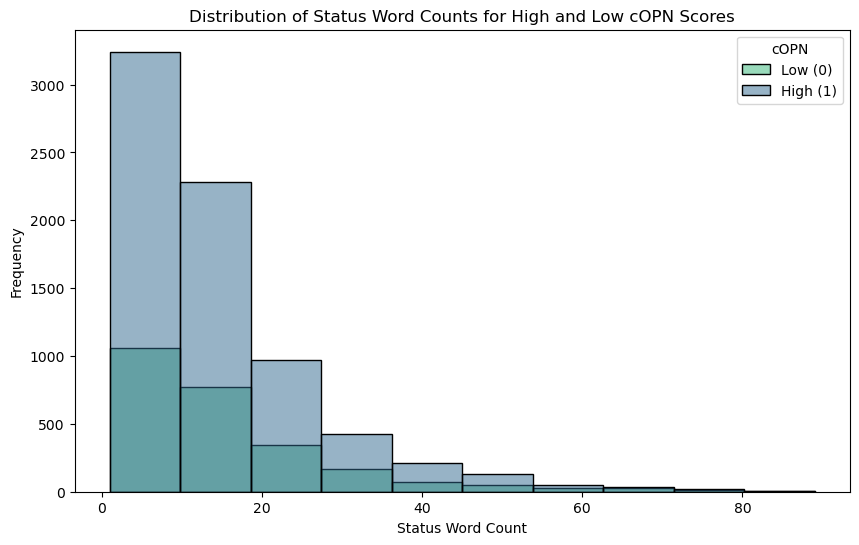

In [209]:
# Visualizing the distribution of status word counts for users scoring high (1) and low (0) in cOPN
# because df_softed is mapping the low as 0 and high as 1

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_sorted, 
    x='status_word_count', 
    hue='copn', 
    bins=10, 
    kde=False, 
    palette='viridis' 
)
plt.title('Distribution of Status Word Counts for High and Low cOPN Scores')
plt.xlabel('Status Word Count')
plt.ylabel('Frequency')
plt.legend(title='cOPN', labels=['Low (0)', 'High (1)'])
plt.show()

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names_out()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

### Show the 15 most common words

In [101]:
df_sorted.columns

Index(['#authid', 'status', 'sext', 'sneu', 'sagr', 'scon', 'sopn', 'cext',
       'cneu', 'cagr', 'ccon', 'copn', 'date', 'status_length',
       'status_word_count'],
      dtype='object')

In [102]:
df_sorted.dtypes

#authid               object
status                object
sext                 float64
sneu                 float64
sagr                 float64
scon                 float64
sopn                 float64
cext                  object
cneu                  object
cagr                  object
ccon                  object
copn                  object
date                  object
status_length          int64
status_word_count      int64
dtype: object

In [103]:
#Instantiate a CountVectorizer object by facebook status
#CountVectorizer requires a vector, so make sure you set X to be a pandas Series, not a DataFrame.
X = df_sorted['status']
# The result ['status'] using Default binary =false = [0,1,2]; however, the model prefer [0.1] that change the default to True
cvec = CountVectorizer(binary=True)

In [225]:
X

0                                                                                                                                                                                                                                                                                                                                                                                                                   157
1                                                                                                                                                                                                                                                                                                                                                                                                                 wed,.
2                                                                                                                                                                                       

In [105]:
# Fit the vectorizer on our corpus
cvec.fit(X)

CountVectorizer(binary=True)

In [106]:
#Transfrom
X_trans = cvec.transform(X)

In [107]:
# Sparse Matrix: A matrix in which most of the elements are zero
# Dense Matrix: A matrix in which most of the elements are non-zero
X_trans

<9916x15468 sparse matrix of type '<class 'numpy.int64'>'
	with 124242 stored elements in Compressed Sparse Row format>

In [108]:
X_trans.shape

(9916, 15468)

In [109]:
X_trans.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [110]:
X_trans_df = pd.DataFrame(X_trans.todense(), columns=cvec.get_feature_names_out())

In [111]:
X_trans_df['status'].unique()

array([0, 1])

In [112]:
X_trans_df.sum().sort_values(ascending=False).head(15)

the         3367
to          3235
is          2738
and         2349
of          1715
in          1714
for         1449
it          1340
my          1300
propname    1023
on           991
that         982
you          971
with         883
be           809
dtype: int64

In [113]:
X_trans_df.sum().sort_values(ascending=False).tail(10)

inky           1
inmigrantes    1
inmóvil        1
inna           1
innability     1
innocent       1
innordinate    1
inputs         1
insatiable     1
últimos        1
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

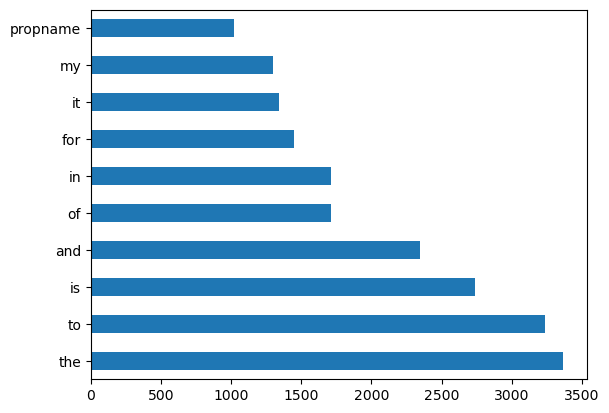

In [115]:
#15 frequency of the most common words as a bar chart
X_trans_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [231]:
# Filter 10 rows where the 'status' column contains the word 'propname'
propname_statuses = df_sorted[df_sorted['status'].str.contains('propname', case=False, na=False)]

print(propname_statuses[['status']].head(10)) 

                  status
8            *PROPNAME* 
65            *PROPNAME*
75            *PROPNAME*
115           *PROPNAME*
197        *PROPNAME*'s?
205           *PROPNAME*
269    RIP *PROPNAME*...
277    R.I.P. *PROPNAME*
281    loved *PROPNAME*!
295  Goodbye *PROPNAME*.


**Provide a short explanation of what you believe `propname` to be:**

In [ ]:
#from document
#each proper name of person has
#been replaced with a fixed string (*PROPNAME*).

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

**Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:**

In [121]:
#class_columns = ['cext', 'cneu', 'cagr', 'ccon', 'copn']
text_and_scores = pd.concat([X_trans_df, df_sorted[class_columns]], axis=1)
text_and_scores

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,été,être,østersund,últimas,últimos,cext,cneu,cagr,ccon,copn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,n,y,n,y
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,n,n,n,y
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,y,n,y
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,n,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,y,n,y,n,n
9912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,n,y,n,y
9913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,n,y,y,n
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,y,n,y


**Show the 25 most common words for statuses from high-cAGR users:**

In [199]:
cagr_users = text_and_scores[text_and_scores['cagr'] == 'y']
most_common_words = cagr_users.drop(columns=class_columns).sum().sort_values(ascending=False).head(25)
most_common_words

the         1778
to          1769
is          1475
and         1236
of           951
in           861
for          790
my           719
it           688
you          543
propname     525
that         521
on           517
with         465
be           434
me           390
just         382
at           381
this         373
have         360
so           336
all          333
not          310
can          296
but          287
dtype: int64

**Show the 25 most common words for statuses from low-cAGR users:**

In [203]:
cagr_users = text_and_scores[text_and_scores['cagr'] == 'y']
most_common_words = cagr_users.drop(columns=class_columns).sum().sort_values(ascending=False).tail(25)
most_common_words

mammals        0
mamma          0
mamacita       0
malmal         0
malleus        0
malfoy         0
maleficarum    0
malarone       0
malaria        0
mal            0
majestic       0
madonna        0
maintenant     0
mains          0
mainly         0
main           0
mailing        0
mai            0
magnificent    0
magnificat     0
magnetic       0
acknowledge    0
maestro        0
madre          0
últimos        0
dtype: int64

### Most common bigrams:

Find the 10 most common [**bigrams**](https://en.wikipedia.org/wiki/Bigram) in the dataset.

In [127]:
X_gram_cvec = df_sorted['status']
bi_cvec = CountVectorizer(analyzer='word', ngram_range=(2, 2), stop_words='english'
bi_cvec.fit(X_gram_cvec)

CountVectorizer(ngram_range=(2, 2), stop_words='english')

In [128]:
X_bi_cvec_train = bi_cvec.transform(X_gram_cvec)

In [129]:
bigram_df = pd.DataFrame(X_bi_cvec_train.todense(), columns=bi_cvec.get_feature_names_out())
bigram_df.sum().sort_values(ascending=False).head(10)

propname propname    147
just got              55
new year              53
http www              46
merry christmas       44
looking forward       43
feel like             39
happy new             32
don know              31
birthday wishes       29
dtype: int64

### Most common trigrams:

Find the 10 most common [**trigrams**](https://en.wikipedia.org/wiki/Trigram) in the dataset.

In [131]:
trigrams =CountVectorizer(analyzer='word', ngram_range=(3, 3), stop_words='english')
trigrams.fit(X_gram_cvec)

CountVectorizer(ngram_range=(3, 3), stop_words='english')

In [132]:
X_trigrams_train = trigrams.transform(X_gram_cvec)

In [133]:
trigram_df = pd.DataFrame(X_trigrams_train.todense(), columns=trigrams.get_feature_names_out())
trigram_df.sum().sort_values(ascending=False).head(10)

propname propname propname    54
gainesville film industry     23
www examiner com              23
http www examiner             23
24676 gainesville film        23
film industry examiner        23
happy new year                21
examiner com examiner         20
com examiner 24676            20
examiner 24676 gainesville    20
dtype: int64

In [ ]:
trigram_df.sum().sort_values(ascending=False).head(30)

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

In [ ]:
#Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
# Zip Code : 24676 [PO BOX 24601 (From 24601 To 24676), DENVER, CO 80224-0601, USA ] in Top-ten of Trigram
# however, the 24676 is a part of url in the infomation that export.
# http:////www.examiner.com//examiner//x-24676-Gainesville-Film-Industry-Examiner~y2009m11d22-Precious,1,0,1,1,0
# https://huggingface.co/datasets/holistic-ai/Personality_mypersonality/viewer/default/train?p=2


# PROPNAME has been used to redact personal names. Given that this data was scraped between 2009 and 2011, 
# investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
# According to information 
#9822 Ten Movies to Watch Right Now (and some you can Instant Netflix) 
#1. La Vie En Rose 2. Shrink (if you love LA) 3. Paris Je'taime (if you love Paris) 
# 3. Clay Pidgeons (*PROPNAME* is priceless) 4. Quills 5. Away We Go 6. Sunshine Cleaning 
#7. A League of Their Own 8. Smart People (I Heart *PROPNAME*'s Page and SJP) 9. Frost//Nixon 10. Doubt
Clay Pidgeons: Joaquin Phoenix 
Smart People: Ellen Page



In [235]:
# Filter 20 rows where the 'status' column contains the word 'propname'
propname_statuses = df_sorted[df_sorted['status'].str.contains('propname', case=False, na=False)]

print(propname_statuses[['status']].tail(20)) 

                                                                                                                                                                                                                                                                                                                                                                                                               status
9814                                                                           wow *PROPNAME*.. i gotta steal this from you for those friends of mine who are not in your list: "Fight for it! Dont give up no matter how hopeless it seems right now, even when youve lost hope and angry, because years from now your gonna look back and wish you gave it one more shot -BECAUSE THE BEST THINGS DONT COME EASY"
9815                                                     Another "Nutcracker Weekend" is over.  *PROPNAME* danced in "Act II Opener" and "Chinese" - and did fantastic!  *PROPNAME*'s last y

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [**exploratory vs. explanatory analysis**](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as **_explanatory_**. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

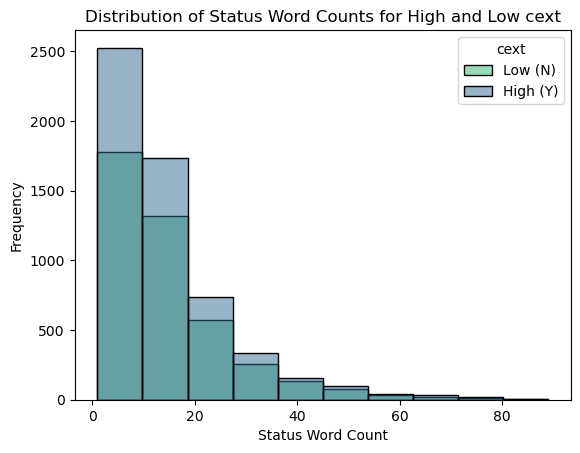

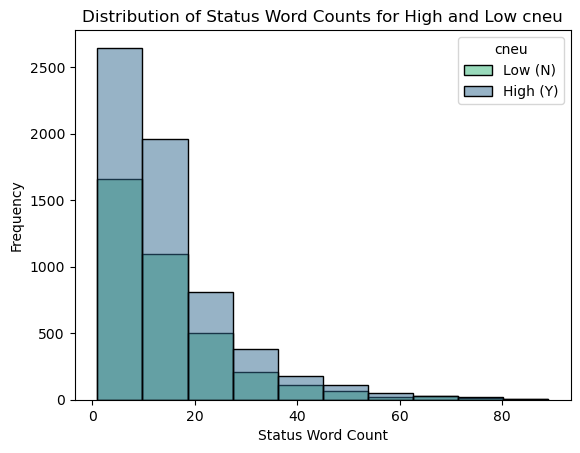

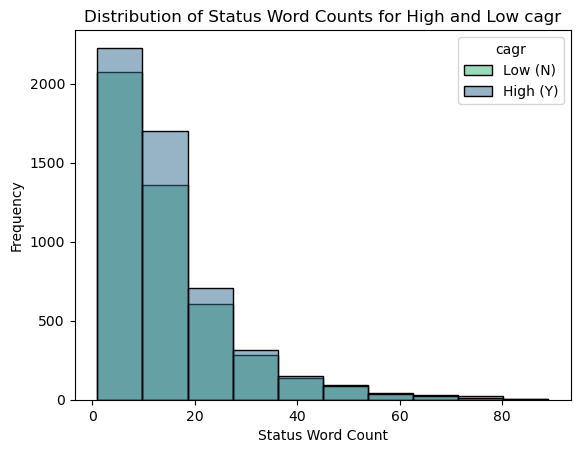

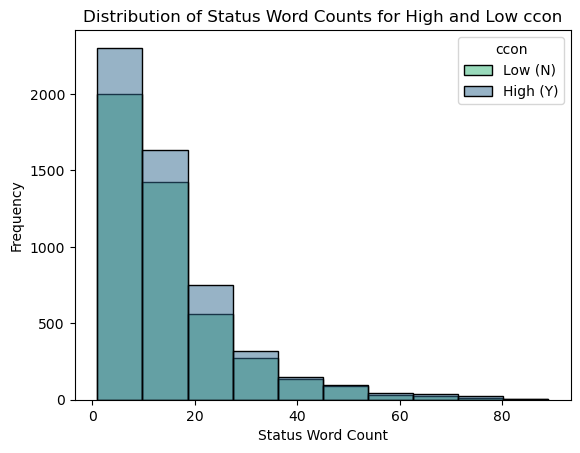

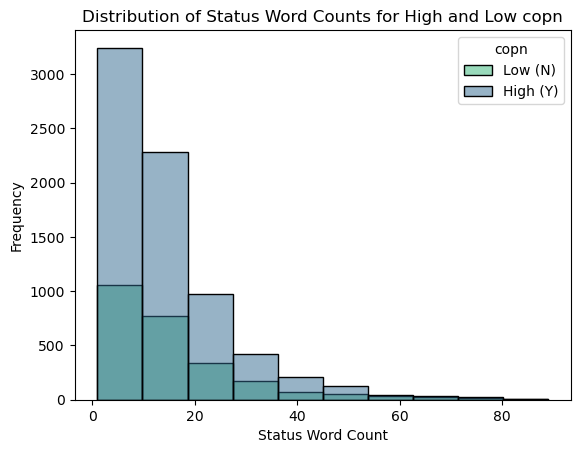

In [263]:

for class_column in class_columns:
    sns.histplot(
        data=df_sorted, 
        x='status_word_count', 
        hue=class_column, 
        bins=10, 
        kde=False, 
        palette='viridis' )
    plt.title(f'Distribution of Status Word Counts for High and Low {class_column}')
    plt.xlabel('Status Word Count')
    plt.ylabel('Frequency')
    plt.legend(title=class_column, labels=['Low (N)', 'High (Y)'])
    plt.show()
